In [1]:
import numpy as np 
import pandas as pd 
from scipy import ndimage as ndi
from skimage.data import rocket, camera, astronaut, clock, coffee, page, coins, gravel, hubble_deep_field, logo
from skimage import color
from skimage.filters import try_all_threshold, threshold_otsu, threshold_local, sobel, gaussian
from skimage.exposure import equalize_hist, equalize_adapthist
from skimage.transform import rotate, resize, rescale
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral ,denoise_nl_means, estimate_sigma
from skimage.measure import find_contours
from skimage.io import imread, imshow
from skimage import data, img_as_float
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh, peak_local_max
from skimage.color import rgb2gray
from skimage.segmentation import watershed, active_contour
import matplotlib.pyplot as plt
import os
%matplotlib inline

c:\Users\ozden\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

import os
import numpy as np
from skimage import io, transform

def load_and_resize_images(image_folder, target_size=(256, 256)):
    resized_images = []
    for file_name in os.listdir(image_folder):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(image_folder, file_name)
            image = io.imread(file_path)
            
            # Görüntüyü hedef boyuta yeniden boyutlandır
            image_resized = transform.resize(image, target_size, anti_aliasing=True)
            
            # Liste'ye ekle
            resized_images.append(image_resized)
            
    return np.array(resized_images, dtype=np.float32)

# Veri setini yükle ve yeniden boyutlandır
image_folder = r"C:\Users\ozden\Downloads\c-bitirme\dataset"
resized_images = load_and_resize_images(image_folder)

print(f"Total images resized: {len(resized_images)}")

Total images resized: 500


In [10]:
def save_resized_images(images, save_folder):
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)  # Klasör yoksa oluştur

    for i, image in enumerate(images):
        # Görüntüyü 'uint8' türüne çevir
        image_ubyte = img_as_ubyte(image)
        # Dosya yolu oluştur
        file_path = os.path.join(save_folder, f'resized_image_{i}.png')
        # Görüntüyü kaydet
        io.imsave(file_path, image_ubyte)
        print(f'Saved: {file_path}')


In [12]:
# Yeniden boyutlandırılan görüntüleri kaydetme klasörü
save_folder = r'C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset'
save_resized_images(resized_images, save_folder)


Saved: C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset\resized_image_0.png
Saved: C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset\resized_image_1.png
Saved: C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset\resized_image_2.png
Saved: C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset\resized_image_3.png
Saved: C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset\resized_image_4.png
Saved: C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset\resized_image_5.png
Saved: C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset\resized_image_6.png
Saved: C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset\resized_image_7.png
Saved: C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset\resized_image_8.png
Saved: C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset\resized_image_9.png
Saved: C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset\resized_image_10.png
Saved: C:

In [13]:
from skimage.color import rgb2gray
from skimage import io, img_as_ubyte
import os
import numpy as np

def convert_images_to_grayscale(image_folder, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)  # If the target folder doesn't exist, create it

    # Sort the file list to ensure consistent order
    files = sorted(os.listdir(image_folder))
    
    # Process each file in the folder
    for file_name in files:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load the image file with the full path
            file_path = os.path.join(image_folder, file_name)
            image = io.imread(file_path)
            
            # Check if the image is RGB and convert to grayscale
            if image.ndim == 3 and image.shape[2] == 3:  # Check for RGB image
                image_gray = rgb2gray(image)
            else:
                image_gray = image  # If already gray, no change needed
            
            # Save the converted grayscale image
            save_path = os.path.join(target_folder, file_name)
            io.imsave(save_path, img_as_ubyte(image_gray))  # Save using the appropriate data type
            print(f'Saved grayscale image to {save_path}')

# Define folder paths
image_folder = r'C:\Users\ozden\Downloads\c-bitirme\dataset\resized_new_dataset'
target_folder = r'C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset'

# Call the function
convert_images_to_grayscale(image_folder, target_folder)


Saved grayscale image to C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset\resized_image_0.png
Saved grayscale image to C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset\resized_image_1.png
Saved grayscale image to C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset\resized_image_10.png
Saved grayscale image to C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset\resized_image_100.png
Saved grayscale image to C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset\resized_image_101.png
Saved grayscale image to C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset\resized_image_102.png
Saved grayscale image to C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset\resized_image_103.png
Saved grayscale image to C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset\resized_image_104.png
Saved grayscale image to C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset\resized_image_105.png
Saved grayscale image to C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset\resized_image_106.png
Saved

In [14]:
import numpy as np
import random
from skimage.util import random_noise

def add_speckle_noise(image, var=0.05):
    """ Speckle gürültüsü ekler, `var` gürültünün varyansını belirler. """
    return random_noise(image, mode='speckle', var=var, clip=True)


def add_gaussian_noise(image, mean=0, var=0.01):
    """ Gaussian gürültüsü ekler, `mean` ve `var` gürültünün ortalaması ve varyansını belirler. """
    return random_noise(image, mode='gaussian', mean=mean, var=var, clip=True)


def add_salt_and_pepper_noise(image):
    """ Tuz-biber gürültüsü ekler. """
    return random_noise(image, mode='s&p', salt_vs_pepper=0.5, clip=True)


In [17]:
from skimage import io, img_as_ubyte
from skimage.color import rgb2gray

def load_and_noise_images(image_folder, target_folder):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    files = sorted(os.listdir(image_folder))
    noisy_images = []

    for file_name in files:
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(image_folder, file_name)
            image = io.imread(file_path, as_gray=True)  # Directly load as grayscale
            image = image / 255.0  # Normalize to [0, 1]
            
            # Add noise randomly
            noisy_image = randomly_add_noise([image])[0]  # Since the function expects a list
            
            # Save noisy image
            save_path = os.path.join(target_folder, file_name)
            io.imsave(save_path, img_as_ubyte(noisy_image))  # Save as ubyte
            noisy_images.append(noisy_image)
            print(f'Saved noisy image to {save_path}')

    return noisy_images

# Example directory paths
image_folder = r'C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset'
target_folder = r'C:\Users\ozden\Downloads\c-bitirme\noisy_images'

# Function call
noisy_images = load_and_noise_images(image_folder, target_folder)


Saved noisy image to C:\Users\ozden\Downloads\c-bitirme\noisy_images\resized_image_0.png
Saved noisy image to C:\Users\ozden\Downloads\c-bitirme\noisy_images\resized_image_1.png
Saved noisy image to C:\Users\ozden\Downloads\c-bitirme\noisy_images\resized_image_10.png
Saved noisy image to C:\Users\ozden\Downloads\c-bitirme\noisy_images\resized_image_100.png
Saved noisy image to C:\Users\ozden\Downloads\c-bitirme\noisy_images\resized_image_101.png
Saved noisy image to C:\Users\ozden\Downloads\c-bitirme\noisy_images\resized_image_102.png
Saved noisy image to C:\Users\ozden\Downloads\c-bitirme\noisy_images\resized_image_103.png
Saved noisy image to C:\Users\ozden\Downloads\c-bitirme\noisy_images\resized_image_104.png
Saved noisy image to C:\Users\ozden\Downloads\c-bitirme\noisy_images\resized_image_105.png
Saved noisy image to C:\Users\ozden\Downloads\c-bitirme\noisy_images\resized_image_106.png
Saved noisy image to C:\Users\ozden\Downloads\c-bitirme\noisy_images\resized_image_107.png
Save

In [16]:
def randomly_add_noise(images):
    noisy_images = []
    for image in images:
        rand = random.random()
        if rand < 0.5:  # %50 Speckle
            noisy_image = add_speckle_noise(image, var=0.2)
        elif rand < 0.8:  # %30 Gauss (toplamda %80'e kadar)
            noisy_image = add_gaussian_noise(image, var=0.2)
        else:  # Geri kalan %20 Tuz-biber
            noisy_image = add_salt_and_pepper_noise(image)
        noisy_images.append(noisy_image)
    return np.array(noisy_images)
 

In [18]:
import keras.layers as layers
import keras.models as models
from keras.initializers import orthogonal


def Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,
                      kernel_initializer=kernel_init, name=prefix+'conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x

def Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
    prefix = f'block_{block_id}_'
    x = layers.Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,
                               kernel_initializer=kernel_init, name=prefix+'de-conv')(x)
    x = layers.LeakyReLU(name=prefix+'lrelu')(x)
    x = layers.Dropout(0.2, name=prefix+'drop')((x))
    x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
    return x



def AutoEncdoer(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # 256 x 256
    conv1 = Conv2DLayer(inputs, 64, 3, strides=1, padding='same', block_id=1)
    conv2 = Conv2DLayer(conv1, 64, 3, strides=2, padding='same', block_id=2)
    
    # 128 x 128
    conv3 = Conv2DLayer(conv2, 128, 5, strides=2, padding='same', block_id=3)
    
    # 64 x 64
    conv4 = Conv2DLayer(conv3, 128, 3, strides=1, padding='same', block_id=4)
    conv5 = Conv2DLayer(conv4, 256, 5, strides=2, padding='same', block_id=5)
    
    # 32 x 32
    conv6 = Conv2DLayer(conv5, 512, 3, strides=2, padding='same', block_id=6)
    
    # 16 x 16
    deconv1 = Transpose_Conv2D(conv6, 512, 3, strides=2, padding='same', block_id=7)
    
    # 32 x 32
    skip1 = layers.concatenate([deconv1, conv5], name='skip1')
    conv7 = Conv2DLayer(skip1, 256, 3, strides=1, padding='same', block_id=8)
    deconv2 = Transpose_Conv2D(conv7, 128, 3, strides=2, padding='same', block_id=9)
    
    # 64 x 64
    skip2 = layers.concatenate([deconv2, conv3], name='skip2')
    conv8 = Conv2DLayer(skip2, 128, 5, strides=1, padding='same', block_id=10)
    deconv3 = Transpose_Conv2D(conv8, 64, 3, strides=2, padding='same', block_id=11)
    
    # 128 x 128
    skip3 = layers.concatenate([deconv3, conv2], name='skip3')
    conv9 = Conv2DLayer(skip3, 64, 5, strides=1, padding='same', block_id=12)
    deconv4 = Transpose_Conv2D(conv9, 64, 3, strides=2, padding='same', block_id=13)
    
    # 256 x 256
    skip3 = layers.concatenate([deconv4, conv1])
    conv10 = layers.Conv2D(1, (3, 3), strides=(1, 1), padding='same', activation='sigmoid',
                       kernel_initializer=orthogonal(), name='final_conv')(skip3)


    
    return models.Model(inputs=inputs, outputs=conv10)

In [63]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_conv        │ (None, 256, 256,  │        640 │ input_layer[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_lrelu       │ (None, 256, 256,  │          0 │ block_1_conv[0][… │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_drop        │ (None, 256, 256,  │          0 │ block_1_lrelu[0]… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_conv_bn     │ (None, 256, 256,  │        256 │ block_1_drop[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_conv        │ (None, 128, 128,  │     36,928 │ block_1_conv_bn[… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_lrelu       │ (None, 128, 128,  │          0 │ block_2_conv[0][… │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_drop        │ (None, 128, 128,  │          0 │ block_2_lrelu[0]… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_2_conv_bn     │ (None, 128, 128,  │        256 │ block_2_drop[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_conv        │ (None, 64, 64,    │    204,928 │ block_2_conv_bn[… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_lrelu       │ (None, 64, 64,    │          0 │ block_3_conv[0][… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_drop        │ (None, 64, 64,    │          0 │ block_3_lrelu[0]… │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_3_conv_bn     │ (None, 64, 64,    │        512 │ block_3_drop[0][… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_conv        │ (None, 64, 64,    │    147,584 │ block_3_conv_bn[… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_lrelu       │ (None, 64, 64,    │          0 │ block_4_conv[0][… │
│ (LeakyReLU)         │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_drop        │ (None, 64, 64,    │          0 │ block_4_lrelu[0]… │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_4_conv_bn     │ (None, 64, 64,    │        512 │ block_4_drop[0][

 Total params: 23,869,957 (91.06 MB)

 Trainable params: 7,955,073 (30.35 MB)

 Non-trainable params: 4,736 (18.50 KB)

 Optimizer params: 15,910,148 (60.69 MB)

In [19]:
from keras.optimizers import Adam

model = AutoEncdoer(input_shape=(256, 256,1))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['accuracy'])


In [20]:
# Paths to the datasets
noisy_image_folder = r'C:\Users\ozden\Downloads\c-bitirme\noisy_images'
clean_image_folder = r'C:\Users\ozden\Downloads\c-bitirme\grayscale_dataset'

In [23]:
noisy_images = load_images_from_folder(noisy_image_folder)
clean_images = load_images_from_folder(clean_image_folder)

In [22]:
def load_images_from_folder(folder, color_mode='grayscale', size=(256, 256)):
    image_files = [f for f in os.listdir(folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    images = []
    for file in image_files:
        img_path = os.path.join(folder, file)
        img = io.imread(img_path)
        if color_mode == 'grayscale' and img.ndim == 3:
            img = rgb2gray(img)  # Convert to grayscale if RGB
        img_resized = transform.resize(img, size, anti_aliasing=True)
        images.append(img_resized)
    return np.array(images, dtype=np.float32)  # Ensure this line is converting list to numpy array


In [24]:
noisy_images = load_images_from_folder(noisy_image_folder, color_mode='grayscale')
clean_images = load_images_from_folder(clean_image_folder, color_mode='grayscale')

print("Noisy Images Shape:", np.array(noisy_images).shape)
print("Clean Images Shape:", np.array(clean_images).shape)


Noisy Images Shape: (500, 256, 256)
Clean Images Shape: (500, 256, 256)


In [25]:
print("Data type of noisy_images:", noisy_images.dtype)
print("Data type of clean_images:", clean_images.dtype)

# If not np.float32, you may need to cast them
noisy_images = noisy_images.astype('float32')
clean_images = clean_images.astype('float32')


Data type of noisy_images: float32
Data type of clean_images: float32


In [26]:
print("Input shape expected by model:", model.input_shape)
print("Actual input shape of noisy_images:", noisy_images.shape)
print("Actual input shape of clean_images:", clean_images.shape)


Input shape expected by model: (None, 256, 256, 1)
Actual input shape of noisy_images: (500, 256, 256)
Actual input shape of clean_images: (500, 256, 256)


In [27]:
# Example of proper compilation
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [38]:
try:
    history = model.fit(
        x=noisy_images,
        y=clean_images,
        epochs=50,
        batch_size=32,
        validation_split=0.2
    )
except Exception as e:
    print("An error occurred:", e)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 158s 12s/step - accuracy: 0.0058 - loss: 0.0115 - val_accuracy: 0.0033 - val_loss: 0.0436
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 113s 9s/step - accuracy: 0.0061 - loss: 0.0108 - val_accuracy: 0.0031 - val_loss: 0.0435
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 117s 9s/step - accuracy: 0.0068 - loss: 0.0101 - val_accuracy: 0.0028 - val_loss: 0.0453
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 116s 9s/step - accuracy: 0.0066 - loss: 0.0092 - val_accuracy: 0.0030 - val_loss: 0.0369
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 116s 9s/step - accuracy: 0.0058 - loss: 0.0091 - val_accuracy: 0.0027 - val_loss: 0.0372
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 117s 9s/step - accuracy: 0.0049 - loss: 0.0085 - val_accuracy: 0.0024 - val_loss: 0.0372
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 116s 9s/step - accuracy: 0.0062 - loss: 0.0080 - val_accuracy: 0.0027 - val_loss: 0.0353
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 121s 9s/step - accuracy: 0.0083 - loss: 0.0076 - val_accuracy: 0.0027 - 

In [ ]:
import matplotlib.pyplot as plt

def display_images(orig, denoised):
    n = 10  # Number of images to display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(orig[i])
        plt.title("Original")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(denoised[i])
        plt.title("Denoised")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

# Predict on test data
predicted = autoencoder.predict(x_test)

# Display some results
display_images(x_test, predicted)


In [39]:
# Assuming 'noisy_images' are preloaded and appropriately preprocessed
denoised_images = model.predict(noisy_images)


16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step


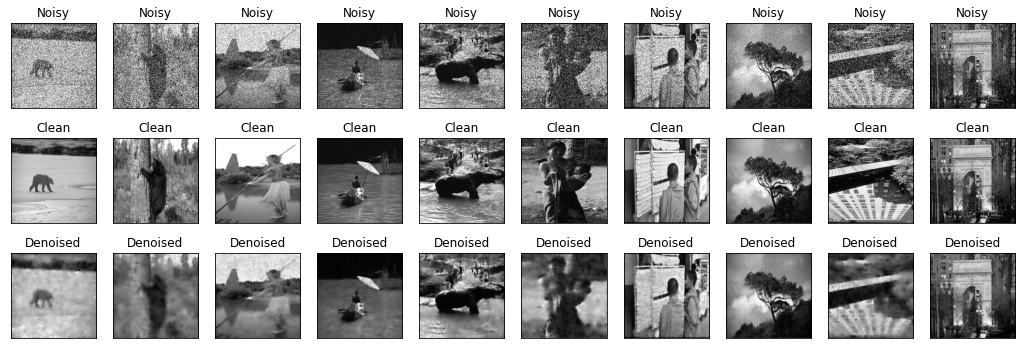

In [40]:
import matplotlib.pyplot as plt

def display_images(noisy, clean, denoised, num_images=10):
    plt.figure(figsize=(18, 6))
    for i in range(num_images):
        # Display noisy images
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(noisy[i].squeeze(), cmap='gray')
        plt.title("Noisy")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display clean images
        ax = plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(clean[i].squeeze(), cmap='gray')
        plt.title("Clean")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display denoised images
        ax = plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(denoised[i].squeeze(), cmap='gray')
        plt.title("Denoised")
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

# Use the function to display the images
display_images(noisy_images[:10], clean_images[:10], denoised_images[:10])


In [43]:
# Add a channel dimension to clean_images
clean_images_expanded = clean_images[:, :, :, np.newaxis]  # This adds a new axis, making it (500, 256, 256, 1)

print("New shape of clean images:", clean_images_expanded.shape)


New shape of clean images: (500, 256, 256, 1)


In [52]:
# Confirm the shape of the images
print("Shape of a clean image:", clean_images_expanded[0].shape)
print("Shape of a denoised image:", denoised_images[0].shape)


Shape of a clean image: (256, 256, 1)
Shape of a denoised image: (256, 256, 1)


In [56]:
def calculate_metrics(original, denoised):
    data_range = denoised.max() - denoised.min()
    psnr_value = psnr(original, denoised, data_range=data_range)
    try:
        # Adjust `channel_axis` for single-channel grayscale images
        ssim_value = ssim(original, denoised, data_range=data_range, win_size=3, channel_axis=2)
    except ValueError as e:
        print(f"Error calculating SSIM: {e}")
        ssim_value = 0  # Default to 0 if SSIM cannot be calculated
    return psnr_value, ssim_value


In [54]:
def calculate_metrics(original, denoised):
    data_range = denoised.max() - denoised.min()
    psnr_value = psnr(original, denoised, data_range=data_range)
    try:
        # No `channel_axis` needed for non-channel specific data
        ssim_value = ssim(original, denoised, data_range=data_range, win_size=3)
    except ValueError as e:
        print(f"Error calculating SSIM: {e}")
        ssim_value = 0
    return psnr_value, ssim_value


In [57]:
# Calculate metrics across all images
total_psnr, total_ssim = 0, 0
num_images = len(clean_images_expanded)

for i in range(num_images):
    p, s = calculate_metrics(clean_images_expanded[i], denoised_images[i])
    total_psnr += p
    total_ssim += s if s != 0 else 0

average_psnr = total_psnr / num_images
average_ssim = total_ssim / max(1, sum(s != 0 for _, s in [calculate_metrics(clean_images_expanded[i], denoised_images[i]) for i in range(num_images)]))

print("Average PSNR:", average_psnr)
print("Average SSIM:", average_ssim)


Average PSNR: 18.816724523797475
Average SSIM: 0.5158688734471798


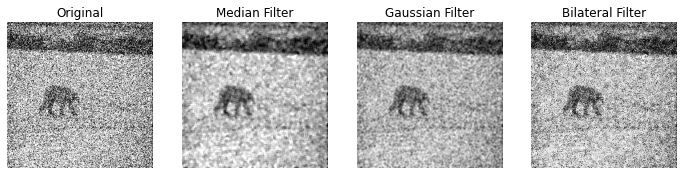

In [58]:
import cv2
import numpy as np

def apply_filters(image):
    # Convert the image to a proper format if necessary
    image = np.uint8(image * 255)

    # Applying Median Filter
    median_filtered = cv2.medianBlur(image, 5)  # Using a kernel size of 5

    # Applying Gaussian Filter
    gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 0)  # Kernel size (5,5) and sigmaX = 0

    # Applying Bilateral Filter
    bilateral_filtered = cv2.bilateralFilter(image, 9, 75, 75)  # Diameter=9, SigmaColor=75, SigmaSpace=75

    return median_filtered, gaussian_filtered, bilateral_filtered

# Example usage with a single image
# Assume `noisy_images` is loaded as an array of images
filtered_images = []
for img in noisy_images:
    filters = apply_filters(img)
    filtered_images.append(filters)  # This will append a tuple of filtered images

# Optionally display or save the filtered images
# For simplicity, let's assume we're using matplotlib to show one set of results
import matplotlib.pyplot as plt

def display_filtered_images(images):
    titles = ['Original', 'Median Filter', 'Gaussian Filter', 'Bilateral Filter']
    fig, axes = plt.subplots(1, 4, figsize=(12, 3))
    for ax, image, title in zip(axes, images, titles):
        ax.imshow(image, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.show()

# Display filtered images of the first noisy image as an example
display_filtered_images([noisy_images[0], *filtered_images[0]])


In [59]:
import os
import cv2
import numpy as np

# Directory to save filtered images
filtered_dirs = {
    'median': 'filtered_images/median',
    'gaussian': 'filtered_images/gaussian',
    'bilateral': 'filtered_images/bilateral'
}

# Ensure directories exist
for dir_path in filtered_dirs.values():
    os.makedirs(dir_path, exist_ok=True)

def apply_and_save_filters(images, base_dir='filtered_images'):
    for i, image in enumerate(images):
        # Convert image to uint8
        image_uint8 = np.uint8(image * 255)
        
        # Apply filters
        median = cv2.medianBlur(image_uint8, 5)
        gaussian = cv2.GaussianBlur(image_uint8, (5, 5), 0)
        bilateral = cv2.bilateralFilter(image_uint8, 9, 75, 75)
        
        # Save images
        cv2.imwrite(os.path.join(filtered_dirs['median'], f'image_{i}.png'), median)
        cv2.imwrite(os.path.join(filtered_dirs['gaussian'], f'image_{i}.png'), gaussian)
        cv2.imwrite(os.path.join(filtered_dirs['bilateral'], f'image_{i}.png'), bilateral)

# Assuming `noisy_images` is your array of noisy images
apply_and_save_filters(noisy_images)


In [61]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.io import imread

def calculate_metrics(clean_img, denoised_img):
    clean_img_uint8 = np.uint8(clean_img * 255)
    denoised_img_uint8 = np.uint8(denoised_img * 255)
    
    psnr_value = psnr(clean_img_uint8, denoised_img_uint8, data_range=255)
    ssim_value, _ = ssim(clean_img_uint8, denoised_img_uint8, data_range=255, full=True)
    return psnr_value, ssim_value

def load_and_evaluate(clean_images, dir_path):
    psnr_values = []
    ssim_values = []
    
    for i in range(len(clean_images)):
        denoised_img_path = os.path.join(dir_path, f'image_{i}.png')
        denoised_img = imread(denoised_img_path, as_gray=True)
        
        p, s = calculate_metrics(clean_images[i], denoised_img)
        psnr_values.append(p)
        ssim_values.append(s)
    
    avg_psnr = np.mean(psnr_values)
    avg_ssim = np.mean(ssim_values)
    
    return avg_psnr, avg_ssim

# Example of evaluating the median filtered images
avg_psnr_median, avg_ssim_median = load_and_evaluate(clean_images, filtered_dirs['median'])
print(f"Median Filter - Average PSNR: {avg_psnr_median}, Average SSIM: {avg_ssim_median}")

avg_psnr_gauss, avg_ssim_gauss = load_and_evaluate(clean_images, filtered_dirs['gaussian'])
print(f"Gaussian Filter - Average PSNR: {avg_psnr_gauss}, Average SSIM: {avg_ssim_gauss}")

avg_psnr_bilateral, avg_ssim_bilateral = load_and_evaluate(clean_images, filtered_dirs['bilateral'])
print(f"Bilateral Filter - Average PSNR: {avg_psnr_bilateral}, Average SSIM: {avg_ssim_bilateral}")

Median Filter - Average PSNR: 7.250251132421821, Average SSIM: -0.08107330372307912
Gaussian Filter - Average PSNR: 7.732880464956759, Average SSIM: -0.14710680967251738
Bilateral Filter - Average PSNR: 7.132103446222103, Average SSIM: -0.10703885649285816


AŞAĞIYA GEREK KAMLADI 02:07
- değiştirilebilir, otoenkoder yapısı aşırı komplike, 3 channel için kurulu, görüntülerin kirletilme oranları çok yüksek 

## noisy dosyası  değişimleri

In [39]:
# Adding a channel dimension to noisy_images
noisy_images = noisy_images[..., np.newaxis]  # This adds a new axis at the end, effectively adding a channel dimension

print("Adjusted shape of noisy_images:", noisy_images.shape)


Adjusted shape of noisy_images: (500, 256, 256, 1, 1)


In [40]:
# After adjusting the input shapes, attempt to train the model again
try:
    history = model.fit(
        x=noisy_images,
        y=clean_images,
        epochs=50,
        batch_size=32,
        validation_split=0.2
    )
    print("Model training started successfully.")
except Exception as e:
    print("An error occurred during model training:", e)


Epoch 1/50
An error occurred during model training: 'str' object has no attribute 'base_dtype'


yeni auto encoder

In [48]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

# Define the autoencoder architecture
def build_autoencoder(input_shape):
    input_img = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder



In [74]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array

def load_images_from_folder(folder, size=(28, 28)):
    images = []
    filenames = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = load_img(img_path, color_mode='grayscale', target_size=size)
            img = img_to_array(img)
            img /= 255.0  # Normalize to [0, 1]
            images.append(img)
            filenames.append(filename)
    return np.array(images), filenames

def load_data(noisy_dir, clean_dir, test_size=0.2, size=(28, 28)):
    # Load noisy and clean images
    noisy_images, noisy_filenames = load_images_from_folder(noisy_dir, size)
    clean_images, clean_filenames = load_images_from_folder(clean_dir, size)

    # Ensure the filenames match if necessary (this assumes filenames from both sets match and are sorted)
    assert noisy_filenames == clean_filenames, "Filenames between noisy and clean images do not match."

    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(noisy_images, clean_images, test_size=test_size, random_state=42)
    return x_train, x_test, y_train, y_test

# Example usage:
noisy_dir = '/Users/ozdenkose/Downloads/bitirme_kod/noisy_images'
clean_dir = '/Users/ozdenkose/Downloads/bitirme_kod/grayscale_dataset'
x_train, x_test, y_train, y_test = load_data(noisy_dir, clean_dir)

# Check shapes
print("Training set shape:", x_train.shape)
print("Testing set shape:", x_test.shape)

# Now you can proceed with creating and training the autoencoder as previously shown


Training set shape: (400, 28, 28, 1)
Testing set shape: (100, 28, 28, 1)


In [92]:
import tensorflow as tf
from keras import layers, models

def build_autoencoder(input_shape):
    input_img = layers.Input(shape=input_shape)
    
    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    # Autoencoder model
    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    return autoencoder


In [113]:
# Suppose x_train_noisy and x_train_clean are your training sets,
# and x_test_noisy and x_test_clean are your testing sets.

autoencoder = build_autoencoder((28, 28, 1))  # Update input_shape accordingly
autoencoder.fit(x_train, y_train, epochs=10, batch_size=128,
                validation_data=(x_test, y_test))


NameError: name 'X_train' is not defined

In [112]:
devices = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(devices[0], enable = True)

IndexError: list index out of range

In [96]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dense, UpSampling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

import tensorflow as tf

encoder_input = Input(shape = x_train.shape[1:])
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
encoded = MaxPool2D(pool_size = (2,2), padding = 'same')(x)

In [95]:
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

In [97]:
autoencoder = Model(encoder_input, decoded, name = 'Denoising_Model')
autoencoder.summary()

Model: "Denoising_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 28, 28,    │        160 │ input_layer_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 14, 14,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 14, 14, 8) │      1,160 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 7, 7, 8)   │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 7, 7, 8)   │        584 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 4, 4, 8)   │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 4, 4, 32)  │      2,336 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 4, 4, 32)  │        128 │ conv2d_27[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_11    │ (None, 8, 8, 32)  │          0 │ batch_normalizat… │
│ (UpSampling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 8, 8, 32)  │      9,248 │ up_sampling2d_11… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 32)  │        128 │ conv2d_28[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_12    │ (None, 16, 16,    │          0 │ batch_normalizat… │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_14      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 16, 16, 1) │        289 │ up_sampling2d_12… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,033 (54.82 KB)

 Trainable params: 13,905 (54.32 KB)

 Non-trainable params: 128 (512.00 B)

In [106]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [114]:
checkpoint = ModelCheckpoint("denoising_model.keras", save_best_only=True, save_weights_only=False, verbose = 1)
history = autoencoder.fit(x_train, y_train, batch_size = 128, epochs = 50, callbacks = checkpoint, validation_split = 0.25, verbose = 2)

Epoch 1/50


KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m140374533960704\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(None, 28, 28, 1), dtype=float32)\n  • training=True\n  • mask=None'